In [10]:
import sys, os
sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

# 60000개 data
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100, 100], output_size=10,
                             activation='relu', weight_init_std='relu', use_dropout=True, dropout_ration = 0.5)  
# affine-relu-dropout -affine-relu-dropout -affine-relu-dropout -affine-relu-dropout -affine-relu-dropout 
# -affine-relu-dropout -affine-relu-dropout -affine-softmax

trainer_2 = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=20, mini_batch_size=100, # 60000개 데이터 // 100 = 600개 * 20번
                  optimizer='Adam', optimizer_param={'lr':0.001},
                  evaluate_sample_num_per_epoch=1000) # 총 12000번!!

trainer_2.train()

train loss:2.302327301857172
=== epoch:1, train acc:0.109, test acc:0.088 ===
train loss:2.3024350168863017
train loss:2.302999776383075
train loss:2.303685682128154
train loss:2.3020597794836926
train loss:2.3025446987890272
train loss:2.3026421219653184
train loss:2.3013832706687603
train loss:2.302978278464221
train loss:2.302997774624338
train loss:2.301174223504152
train loss:2.302991421689626
train loss:2.3023600709352987
train loss:2.3025371596204165
train loss:2.3020926553534284
train loss:2.302811409616474
train loss:2.3015391551655044
train loss:2.3022224323800464
train loss:2.3019468607646196
train loss:2.3034405485838665
train loss:2.2995766390949433
train loss:2.302882485714448
train loss:2.30324387650021
train loss:2.303214063990147
train loss:2.301711316726939
train loss:2.3020787640244054
train loss:2.3022636534730414
train loss:2.304731370142651
train loss:2.300921146024305
train loss:2.301859448637565
train loss:2.3016803518681384
train loss:2.3007414558983057
train l

In [12]:
trainer_2.train_acc_list[-1]

0.867

In [22]:
print(trainer_2.train_loss_list[-1])
print(trainer.train_loss_list[-1])

0.15923464916265598
0.797746090363644


In [ ]:
import sys, os
sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from deep_convnet import DeepConvNet
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

network = DeepConvNet() 
# conv-relu-conv-relu-pool -conv-relu-conv-relu-pool -conv-relu
# -conv-relu-pool -affine-relu-dropout -affine-dropout-softmax
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=20, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr':0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보관
network.save_params("deep_convnet_params.pkl")
print("Saved Network Parameters!")

In [13]:
trainer.train_acc_list[-1]

0.998

In [60]:
iter_per_epoch = max(60000 / 100, 1)
max_iter = int(20 * iter_per_epoch)
print(iter_per_epoch, max_iter)

600.0 12000


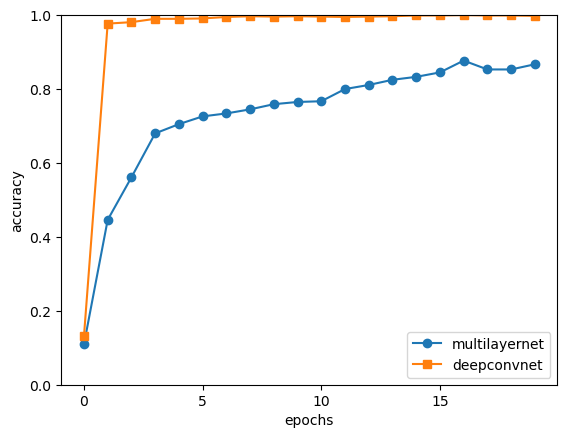

In [20]:
# 비교
x = np.arange(trainer_2.epochs)
plt.plot(x, trainer_2.train_acc_list, marker='o', label='multilayernet')
plt.plot(x, trainer.train_acc_list, marker='s', label='deepconvnet')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.xticks(np.arange(0, trainer_2.epochs, 5))
plt.legend()
plt.show()

In [8]:
import sys, os
sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch07.simple_convnet import SimpleConvNet
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

network = SimpleConvNet()  
'''
# 3층!
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
'''
trainer_3 = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=20, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr':0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer_3.train()

train loss:2.299285690332038
=== epoch:1, train acc:0.133, test acc:0.132 ===
train loss:2.2933920788870714
train loss:2.28933525644492
train loss:2.283067904376638
train loss:2.2812689226816545
train loss:2.2529173027038274
train loss:2.2366377450650448
train loss:2.229158572445792
train loss:2.244634955777349
train loss:2.201370311795443
train loss:2.163568804766224
train loss:2.113296558797133
train loss:2.104122826983899
train loss:2.0788443853050413
train loss:2.0285435026402463
train loss:1.9368165558069261
train loss:1.8829865078216743
train loss:1.7841518457548258
train loss:1.759290652691451
train loss:1.741940823078839
train loss:1.6344926112225406
train loss:1.6844649571606767
train loss:1.481083264372806
train loss:1.43135383991817
train loss:1.257742758831012
train loss:1.2362828881385772
train loss:1.1894019906936801
train loss:1.043204194926063
train loss:1.1242415968263413
train loss:1.1239321024852027
train loss:0.9599443799482696
train loss:0.8809503914761687
train lo

KeyboardInterrupt: 

In [ ]:
import sys, os
sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100], output_size=10,
                             activation='relu', weight_init_std=0.01)  

trainer_4 = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=20, mini_batch_size=100, # 60000개 데이터 // 100 = 600개 * 20번
                  optimizer='Adam', optimizer_param={'lr':0.001},
                  evaluate_sample_num_per_epoch=1000) # 총 12000번!!

trainer_4.train()

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from deep_convnet import DeepConvNet
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

network = DeepConvNet()
network.load_params("deep_convnet_params.pkl")

sampled = 10000 # 고속화를 위한 표본추출
x_test = x_test[:sampled]
t_test = t_test[:sampled]

print("caluculate accuracy (float64) ... ")
print(network.accuracy(x_test, t_test))

# float16(반정밀도)로 형변환
x_test = x_test.astype(np.float16)
for param in network.params.values():
    param[...] = param.astype(np.float16)

print("caluculate accuracy (float16) ... ")
print(network.accuracy(x_test, t_test))

caluculate accuracy (float64) ... 
0.9926
caluculate accuracy (float16) ... 
0.9926


calculating test accuracy ... 
test accuracy:0.9926
======= misclassified result =======
{view index: (label, inference), ...}
{1: (4, 9), 2: (6, 5), 3: (6, 0), 4: (4, 9), 5: (3, 5), 6: (8, 2), 7: (6, 4), 8: (2, 1), 9: (1, 7), 10: (7, 4), 11: (3, 5), 12: (3, 5), 13: (8, 9), 14: (6, 5), 15: (9, 4), 16: (7, 1), 17: (1, 6), 18: (6, 0), 19: (2, 7), 20: (9, 4)}


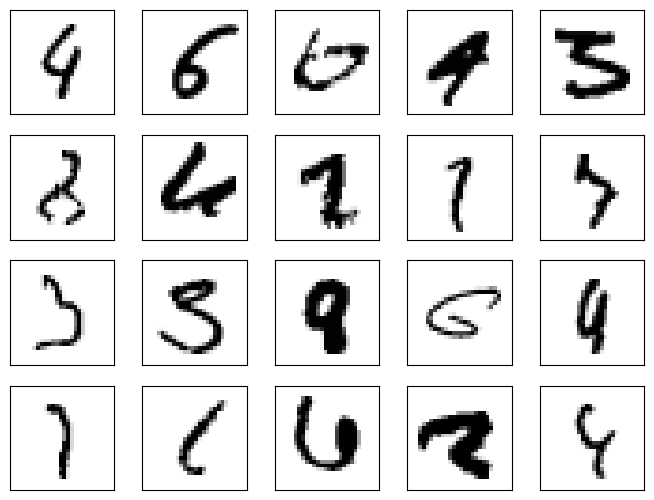

In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from deep_convnet import DeepConvNet
from dataset.mnist import load_mnist


(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

network = DeepConvNet()
network.load_params("deep_convnet_params.pkl")

print("calculating test accuracy ... ")
#sampled = 1000
#x_test = x_test[:sampled]
#t_test = t_test[:sampled]

classified_ids = []

acc = 0.0
batch_size = 100

for i in range(int(x_test.shape[0] / batch_size)):
    tx = x_test[i*batch_size:(i+1)*batch_size]
    tt = t_test[i*batch_size:(i+1)*batch_size]
    y = network.predict(tx, train_flg=False)
    y = np.argmax(y, axis=1)
    classified_ids.append(y)
    acc += np.sum(y == tt)
    
acc = acc / x_test.shape[0]
print("test accuracy:" + str(acc))

classified_ids = np.array(classified_ids)
classified_ids = classified_ids.flatten()
 
max_view = 20
current_view = 1

fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.2)

mis_pairs = {}
for i, val in enumerate(classified_ids == t_test):
    if not val:
        ax = fig.add_subplot(4, 5, current_view, xticks=[], yticks=[])
        ax.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
        mis_pairs[current_view] = (t_test[i], classified_ids[i])
            
        current_view += 1
        if current_view > max_view:
            break

print("======= misclassified result =======")
print("{view index: (label, inference), ...}")
print(mis_pairs)

plt.show()

In [ ]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=False, flatten=False)
x_train[0]

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=False)
x_train[0]

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            -> 이거 전체에 대해 나누는거야 전체 elment-wise

    def _change_one_hot_label(X):
        T = np.zeros((X.size, 10))
        for idx, row in enumerate(T):
            row[X[idx]] = 1
            
        return T    
        

In [14]:
t_train.shape

(60000,)

In [16]:
T = np.zeros((t_train.size, 10))
T.shape

(60000, 10)

In [17]:
T[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
for idx, row in enumerate(T):
    row[t_train[idx]] = 1

In [22]:
print(T[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [23]:
t_train[0]

5

    if not flatten:  -> 이 말은 즉 원래 data가 flatten돼서 나온단 것
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 

In [24]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=False)
x_train.shape

(60000, 1, 28, 28)

In [25]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True)
x_train.shape

(60000, 784)

In [59]:
import sys, os
sys.path.append(os.pardir)
import pickle
import numpy as np
from common.layers import *
# from collections import OrderedDict

class DeepConvNet:
    """ 정확도 99% 이상의 고정밀 합성곱 신경망CNN
    (채널 수 더 늘어나고, 중간 데이터 공간 크기 줄여나감)
    
    conv - relu - conv - relu - pool -
    conv - relu - conv - relu - pool -
    conv - relu - conv - relu - pool - 
    affine - relu - dropout - affine - dropout - softmax

    He 초깃값 & ReLU & Adam optimizer & dropout
    필터 3x3 (small)
    """
    def __init__(self, input_dim=(1, 28, 28), # (N,1,28,28)
                 # 채널 수 점 점 늘어남 (FN,C,FH,FW) -> (N,FN,OH,OW)
                 conv_param_1 = {'filter_num':16, 'filter_size':3, 'pad':1, 'stride':1}, # conv1
                 conv_param_2 = {'filter_num':16, 'filter_size':3, 'pad':1, 'stride':1}, # conv2
                 conv_param_3 = {'filter_num':32, 'filter_size':3, 'pad':1, 'stride':1}, # conv3
                 conv_param_4 = {'filter_num':32, 'filter_size':3, 'pad':1, 'stride':1}, # conv4
                 conv_param_5 = {'filter_num':64, 'filter_size':3, 'pad':1, 'stride':1}, # conv5
                 conv_param_6 = {'filter_num':64, 'filter_size':3, 'pad':1, 'stride':1}, # conv6
                 hidden_size=50, output_size=10): # affine(7,8)
    
        # 1. 가중치filter 초기화==============================================================================
        # 각 층의 뉴런 하나당 앞 층의 몇 개 뉴런과 연결되는가 (N)
        # 6개의 합성곱 계층과 2개의 완전연결 계층에 대한 앞 층의 뉴런의 개수 배열 (C/FN,FH,FW)
        """
        [Input] --(1*3*3)--> [Conv1] --(16*3*3)--> [Conv2] --(16*3*3)--> [Conv3] --(32*3*3)--> [Conv4] --(32*3*3)--> [Conv5] --(64*3*3)--> [Conv6] 
        --(64*4*4)--> [Hidden] --(hidden_size)--> [Output]
        """
        pre_node_nums = np.array([1*3*3, 16*3*3, 16*3*3, 32*3*3, 32*3*3, 64*3*3, 64*4*4, hidden_size])
        weight_init_scales = np.sqrt(2.0 / pre_node_nums) # He 초깃값 (ReLu 사용시 권장)

        # 2. 파라미터 초기화==================================================================================
        self.params = {}
        pre_channel_num = input_dim[0] #(1,28,28)
        # 2(1) 합성곱 계층 (FN,C,FH,FW), (FN,)
        for idx, conv_param in enumerate([conv_param_1, conv_param_2, conv_param_3, conv_param_4, conv_param_5, conv_param_6]):
            self.params['W' + str(idx+1)] = weight_init_scales[idx] \
                                            * np.random.rands(conv_param['filter_num'], pre_channel_num, conv_param['filter_size'], conv_param['filter_size'])
            self.params['b' + str(idx+1)] = np.zeros(conv_param['filter_num'])
            pre_channel_num = conv_param['filter_num']
        # 2(2) 완전연결 게층 (input/filter,hidden/output)
        self.params['W7'] = weight_init_scales[6] * np.random.randn(64*4*4, hidden_size)
        self.params['b7'] = np.zeros(hidden_size)
        self.params['W8'] = weight_init_scales[7] * np.random.randn(hidden_size, output_size)
        self.params['b8'] = np.zeros(output_size)

        # 3. layer 생성======================================================================================
        self.layers = [] # OrderedDict()
        # 3(1) (self, W, b, stride=1, pad=0) / (self, pool_h, pool_w, stride=1, pad=0)
        self.layers.append(Convolution(self.params['W1'], self.params['b1'], conv_param_1['stride'], conv_param_1['pad']))
        self.layers.append(Relu())
        
        self.layers.append(Convolution(self.params['W2'], self.params['b2'], conv_param_2['stride'], conv_param_2['pad']))
        self.layers.append(Relu())
        self.layers.append(Pooling(pool_h=2, pool_w=2, stride=2))
        
        self.layers.append(Convolution(self.params['W3'], self.params['b3'], conv_param_3['stride'], conv_param_3['pad']))
        self.layers.append(Relu())
        
        self.layers.append(Convolution(self.params['W4'], self.params['b4'], conv_param_4['stride'], conv_param_4['pad']))
        self.layers.append(Relu())
        self.layers.append(Pooling(pool_h=2, pool_w=2, stride=2))
        
        self.layers.append(Convolution(self.params['W5'], self.params['b5'], conv_param_5['stride'], conv_param_5['pad']))
        self.layers.append(Relu())
        
        self.layers.append(Convolution(self.params['W6'], self.params['b6'], conv_param_6['stride'], conv_param_6['pad']))
        self.layers.append(Relu())
        self.layers.append(Pooling(pool_h=2, pool_w=2, stride=2))         
        
        # 3(2) (self, W, b) / (self, dropout_ratio=0.5)
        self.layers.append(Affine(self.params['W7'], self, params['b7']))
        self.layers.append(Relu())
        self.layers.append(Dropout(0.5))

        self.layers.append(Affine(self.params['W8'], self.params['b8']))
        self.layers.append(Dropout(0.5))
                           
        # 3(3)
        self.last_layer = SoftmaxWithLoss()

    # 4. predict(forward)=====================================================================================
    def predict(self, x, train_flg=False):
        for layer in self.layers:
            if isinstance(layer, Dropout): # 주어진 인스턴스가 어떤 클래스/데이터 타입인지
                x = layer.forward(x, train_flg)
            else:
                x = layer.forward(x)
    # 5. loss(forward~loss)====================================================================================
    def loss(self, x, t):
        y = self.predict(x, train_flg=True) # train시 true default
        return self.last_layer.forward(y, t)
        
    # 6. accuracy==============================================================================================
    def accuracy(self, x, t, batch_size=100):
        # 원핫->label
        if t.dim != 1 : t = np.argmax(t, axis=1)             
        # 정확도 초기화
        acc = 0.0
        # 1 epoch만큼!! (즉 데이터 전체 다 돎)
        for i in range(int(x.shape[0] / batch_size)): # 버림
            tx = x[i*batch_size:(i+1)*batch_size] # 0*100 ~ 1*100
            tt = t[i*batch_size:(i+1)*batch_size] # -> slicing
            y = self.predict(tx, train_flag=False) # regularization 끄기
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)
        return acc / x.shape[0]

    # 7. for&back&grads=========================================================================================
    def gradient(self, x, t):
        # forward
        self.loss(x, t)
        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        tmp_layers = self.layers.copy() # layers = list(self.layers.values())
        tmp_layers.reverse()
        for layer in tmp_layers:
            dout = layer.backward(dout)
        # save grads
        grads = {}                    # c-r - c-r-p - c-r - c-r-p - c-r - c-r-p - a-r-d - a-d - s
        for i, layer_idx in enumerate((0, 2, 5, 7, 10, 12, 15, 18)):
            grads['w' + str(i+1)] = self.layers[layer_idx].dW
            grads['b' + str(i+1)] = self.layers[layer_idx].db
        return grads

    # 9. 가중치 저장(pickle)======================================================================================
    def save_params(self, file_name="params.pkl"):
        # 새로운 dict에 옮겨주기
        params = {}
        for key, val in self.params.items():
            params[key] = val
        # 저장
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)
            
    # 9. 가중치 로드(pickle)======================================================================================
    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        # self.params에 덮어쓰기
        for key, val in params.items():
            self.params[key] = val
        # layer 별로 직접 가중치 값 할당
        for i, layer_idx in enumerate((0, 2, 5, 7, 10, 12, 15, 18)):
            self.layers[layer_idx].W = self.params['W' + str(i+1)]
            self.layers[layer_idx].b = self.params['b' + str(i+1)]

In [ ]:
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from deep_convnet import DeepConvNet 
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

network = DeepConvNet()
# Trainer : optimizer, epoch당 acc, 최종 test acc
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=20, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr':0.001},
                  evaluate_sample_num_per_epoch=1000)

triner.train()

# 매개변수 보관
network.save_params("deep_convnet_params.pkl")
print("Saved Network Parameters!")

calculating test accuracy ... 
test accuracy:0.9926
======= misclassified result =======
{view index: (label, inference), ...}
{1: (4, 9), 2: (6, 5), 3: (6, 0), 4: (4, 9), 5: (3, 5), 6: (8, 2), 7: (6, 4), 8: (2, 1), 9: (1, 7), 10: (7, 4), 11: (3, 5), 12: (3, 5), 13: (8, 9), 14: (6, 5), 15: (9, 4), 16: (7, 1), 17: (1, 6), 18: (6, 0), 19: (2, 7), 20: (9, 4)}


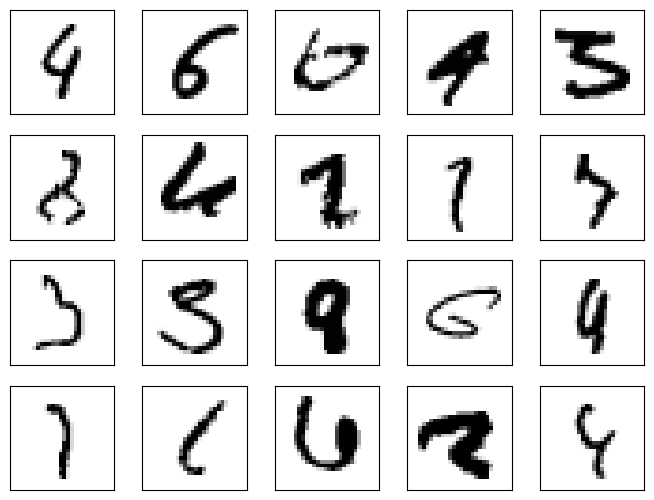

In [78]:
import os, sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from deep_convnet import DeepConvNet
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# trainer 필요없다! 바로 test
network = DeepConvNet()
network.load_params("deep_convnet_params.pkl")
print("calculating test accuracy ... ")

# 분류 결과
classified_ids = []

acc = 0.0
batch_size = 100
# 1 epoch (전체 데이터셋) : 100번 (0~99)
for i in range(int(x_test.shape[0] / batch_size)):
    tx = x_test[i*batch_size:(i+1)*batch_size]
    tt = t_test[i*batch_size:(i+1)*batch_size]
    y = network.predict(tx, train_flg=False) # logits(score)
    y = np.argmax(y, axis=1)
    classified_ids.append(y) # 1회당 100개의 set에 대해
    acc += np.sum(y == tt)

acc = acc / x_test.shape[0]
print("test accuracy:" + str(acc))

classified_ids = np.array(classified_ids) # list to array
classified_ids = classified_ids.flatten() # 레이블(10000,)과 비교하려고!
                                          # 안하면 (100,100)

# 틀린 이미지 20개까지만 보여주기 위함
max_view = 20
current_view = 1

fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.2)

mis_pairs = {}
for i, val in enumerate(classified_ids == t_test): # 1. boolean 배열 반환 (classified_ids == t_test)
                                                   # 2. 배열 순회 1~1000개(i)
    if not val: # False, 같지 않다면
        ax = fig.add_subplot(4, 5, current_view, xticks=[], yticks=[]) # add_subplot(r,c,idx)
        ax.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
        mis_pairs[current_view] = (t_test[i], classified_ids[i])

        current_view += 1
        if current_view > max_view:
            break

print("======= misclassified result =======")
print("{view index: (label, inference), ...}")
print(mis_pairs)

plt.show()

calculating test accuracy ... 
test accuracy:0.9926
======= misclassified result =======
{view index: (label, inference), ...}
{1: (4, 9), 2: (6, 5), 3: (6, 0), 4: (4, 9), 5: (3, 5), 6: (8, 2), 7: (6, 4), 8: (2, 1), 9: (1, 7), 10: (7, 4), 11: (3, 5), 12: (3, 5), 13: (8, 9), 14: (6, 5), 15: (9, 4), 16: (7, 1), 17: (1, 6), 18: (6, 0), 19: (2, 7), 20: (9, 4)}


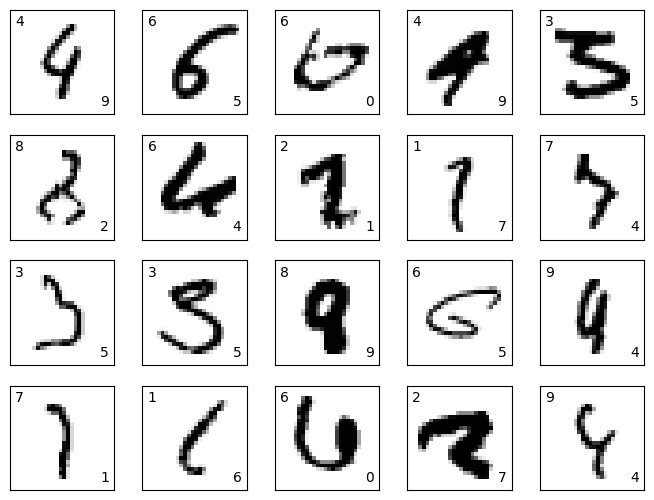

In [86]:
import os, sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from deep_convnet import DeepConvNet
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# trainer 필요없다! 바로 test
network = DeepConvNet()
network.load_params("deep_convnet_params.pkl")
print("calculating test accuracy ... ")

# 분류 결과
classified_ids = []

acc = 0.0
batch_size = 100
# 1 epoch (전체 데이터셋) : 100번 (0~99)
for i in range(int(x_test.shape[0] / batch_size)):
    tx = x_test[i*batch_size:(i+1)*batch_size]
    tt = t_test[i*batch_size:(i+1)*batch_size]
    y = network.predict(tx, train_flg=False) # logits(score)
    y = np.argmax(y, axis=1)
    classified_ids.append(y) # 1회당 100개의 set에 대해
    acc += np.sum(y == tt)

acc = acc / x_test.shape[0]
print("test accuracy:" + str(acc))

classified_ids = np.array(classified_ids) # list to array
classified_ids = classified_ids.flatten() # 레이블(10000,)과 비교하려고!
                                          # 안하면 (100,100)

# 틀린 이미지 20개까지만 보여주기 위함
max_view = 20
current_view = 1

fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.2)

mis_pairs = {}
for i, val in enumerate(classified_ids == t_test):
    if not val:
        ax = fig.add_subplot(4, 5, current_view, xticks=[], yticks=[])
        ax.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
        
        # 왼쪽 상단에 실제 레이블 (label) 추가 (서브플롯 상대적 위치 좌표, 0~1)
        ax.text(0.05, 0.95, t_test[i], ha='left', va='top', transform=ax.transAxes) # x왼끝/y위끝 지정된 좌표에
        # 오른쪽 하단에 예측 레이블 (inference) 추가
        ax.text(0.95, 0.05, classified_ids[i], ha='right', va='bottom', transform=ax.transAxes)
        
        mis_pairs[current_view] = (t_test[i], classified_ids[i])

        current_view += 1
        if current_view > max_view:
            break

print("======= misclassified result =======")
print("{view index: (label, inference), ...}")
print(mis_pairs)

plt.show()

In [71]:
classified_ids = np.array(classified_ids)
classified_ids

array([1, 2, 3, 4, 5])

In [72]:
classified_ids = classified_ids.flatten()

In [76]:
t_test = [3, 4, 7, 3, 2]
for i, val in enumerate(classified_ids == t_test):
    print(i,val)

0 False
1 False
2 False
3 False
4 False


In [67]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from deep_convnet import DeepConvNet
from dataset.mnist import load_mnist


(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

network = DeepConvNet()
network.load_params("deep_convnet_params.pkl")

print("calculating test accuracy ... ")
#sampled = 1000
#x_test = x_test[:sampled]
#t_test = t_test[:sampled]

classified_ids = []

acc = 0.0
batch_size = 100

for i in range(int(x_test.shape[0] / batch_size)):
    tx = x_test[i*batch_size:(i+1)*batch_size]
    tt = t_test[i*batch_size:(i+1)*batch_size]
    y = network.predict(tx, train_flg=False)
    y = np.argmax(y, axis=1)
    classified_ids.append(y)
    acc += np.sum(y == tt)
    
acc = acc / x_test.shape[0]
print("test accuracy:" + str(acc))

classified_ids = np.array(classified_ids)
print(classified_ids)
print(classified_ids.shape)
#classified_ids = classified_ids.flatten() 


calculating test accuracy ... 
test accuracy:0.9926
[[7 2 1 ... 7 6 9]
 [6 0 5 ... 6 4 2]
 [3 6 1 ... 0 2 8]
 ...
 [2 9 5 ... 3 2 1]
 [0 0 1 ... 0 1 7]
 [8 9 0 ... 4 5 6]]
(100, 100)


In [ ]:
for i in range(int(x_test.shape[0] / batch_size)):
    print(i)

In [ ]:
for i in range(int(x_test.shape[0] / batch_size)):
    print(i*batch_size)

이 코드는 Matplotlib의 subplot들 간의 여백을 조정하는 역할을 합니다. 여기서 사용되는 `subplots_adjust()` 메서드는 subplot들의 간격 및 여백을 조절하는 데 사용됩니다.

구체적으로 각 매개변수가 하는 일은 다음과 같습니다:

- `left`: subplot 영역의 왼쪽 가장자리와 figure 영역의 왼쪽 가장자리 사이의 공간을 나타냅니다. 왼쪽 여백을 설정합니다.
- `right`: subplot 영역의 오른쪽 가장자리와 figure 영역의 오른쪽 가장자리 사이의 공간을 나타냅니다. 오른쪽 여백을 설정합니다.
- `bottom`: subplot 영역의 아래쪽 가장자리와 figure 영역의 아래쪽 가장자리 사이의 공간을 나타냅니다. 아래쪽 여백을 설정합니다.
- `top`: subplot 영역의 위쪽 가장자리와 figure 영역의 위쪽 가장자리 사이의 공간을 나타냅니다. 위쪽 여백을 설정합니다.
- `hspace`: 수직 공간을 나타냅니다. subplot들 간의 세로 간격을 설정합니다.
- `wspace`: 수평 공간을 나타냅니다. subplot들 간의 가로 간격을 설정합니다.

위 코드에서는 모든 subplot들의 여백을 최소화하기 위해 `left`, `right`, `bottom`, `top`을 0으로 설정하고, subplot들 간의 간격을 조정하기 위해 `hspace`, `wspace`를 0.2로 설정하고 있습니다. 이를 통해 subplot들 간의 간격을 설정하여 레이아웃을 보다 조밀하게 만들 수 있습니다.

transform=ax.transAxes는 텍스트 위치의 좌표계를 설정하는 옵션입니다. 이 옵션을 사용하면 x와 y 좌표를 서브플롯의 축에 상대적인 값으로 지정할 수 있습니다.

ax.transAxes는 서브플롯의 축을 기준으로 하는 좌표계를 의미하며, 이 좌표계에서는 (0, 0)이 서브플롯의 왼쪽 하단이고, (1, 1)이 오른쪽 상단이 됩니다. 따라서, 예를 들어 (0, 1)은 서브플롯의 왼쪽 상단, (1, 0)은 서브플롯의 오른쪽 하단을 나타냅니다.

이 옵션을 사용하면 서브플롯의 크기와 위치에 상관없이 텍스트가 항상 서브플롯 내에 위치하도록 할 수 있습니다. 이는 특히 여러 개의 서브플롯이 있는 그림에서 유용합니다.